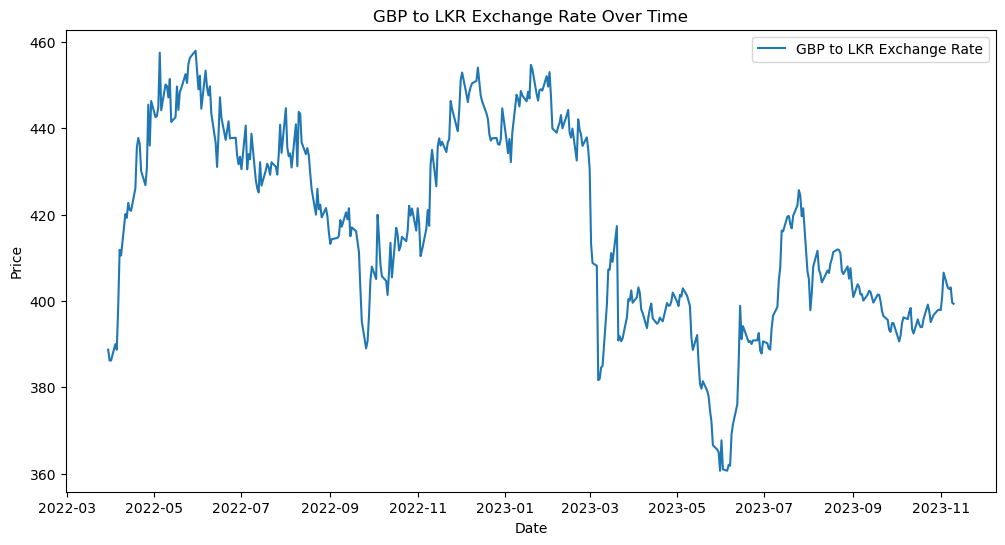

C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                 SARIMAX Results                                  
Dep. Variable:                      Price   No. Observations:                  423
Model:             SARIMAX(1, 1, [1], 12)   Log Likelihood               -1703.933
Date:                    Wed, 13 Dec 2023   AIC                           3413.867
Time:                            11:19:52   BIC                           3425.923
Sample:                                 0   HQIC                          3418.636
                                    - 423                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0768     36.421      0.002      0.998     -71.308      71.461
ma.S.L12      -0.0751     36.422     -0.002      0.998     -71.461      71.311
sigma2       233.636

C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Read the CSV file into a DataFrame
df = pd.read_csv('GBP.csv', parse_dates=['Date'], index_col='Date')

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df['Price'], label='GBP to LKR Exchange Rate')
plt.title('GBP to LKR Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#P,D,Q order values
order = (0, 0, 0)
seasonal_order = (1, 1, 1, 12)

# Fit SARIMA model
model = SARIMAX(df['Price'], order=order, seasonal_order=seasonal_order)
results = model.fit()

# Display the model summary
print(results.summary())

# Forecast today's exchange rate
forecast_steps = 1
forecast = results.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean

# Print the predicted exchange rate for today
print("Predicted Exchange Rate for Today:", forecast_values.iloc[-1])
